## Principal component analysis
*Summary:* We find that 20 features attained from PCA explain 95% of the variance and 27 features explain 99% of the dataset. 

Read data from csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("../dataset/UNSW_NB15_training-set.csv")
test = pd.read_csv("../dataset/UNSW_NB15_testing-set.csv")

Here, we concatenate the `train` and `test` sets, and drop the "id" column. Furthermore, we drop the categorical columns from the dataframe, so that we can perform PCA 

In [2]:
data = pd.concat([train, test]).reset_index(drop=True)
data = data.drop(columns=["id"], axis=1)

# get numeric column names
num_cols = data._get_numeric_data().columns

# subract numeric columns from all columns to get categorical columns 
cat_cols = list(set(data.columns) - set(num_cols))

num_data = data.drop(columns=cat_cols, axis=1)
num_data.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,0.0,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,...,2,1,3,0,0,0,2,3,0,0


We scale the dataframe using the standard scaler (in the range [0-1]). Thereafter, we use the PCA class to perform the algorithm.

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

std_scl = StandardScaler()
num_data = std_scl.fit_transform(num_data)

pca = PCA().fit(num_data)

PCA allows for dimensionality reduction. We can simply supply the algorithm with the amount of features that we want to reduce to. 
In our case, there are 40 features (excluding categorical features) in the UNSW_NB15 data set. We can pass values to the n_components param (e.g., `n_components=10`, will yield 10 features based on the 40 input features). However, choosing `n` arbitrarily is not optimal. So we can set a threshold for the amount of variance that PCA's features produce. Here we set the threshold at 95% and 99%.  

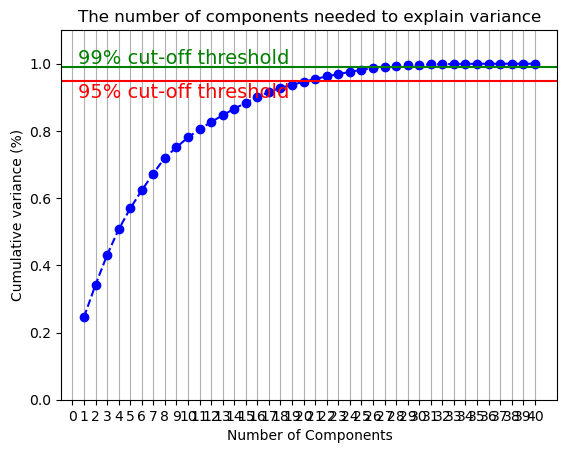

In [4]:
fig, ax = plt.subplots()
xi = np.arange(1, 41, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.rcParams["figure.figsize"] = (12,6)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 41, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.9, '95% cut-off threshold', color='red', fontsize=14)

plt.axhline(y=0.99, color='g', linestyle='-')
plt.text(0.5, 1, '99% cut-off threshold', color='green', fontsize=14)

ax.grid(axis='x')
plt.show()

<AxesSubplot: >

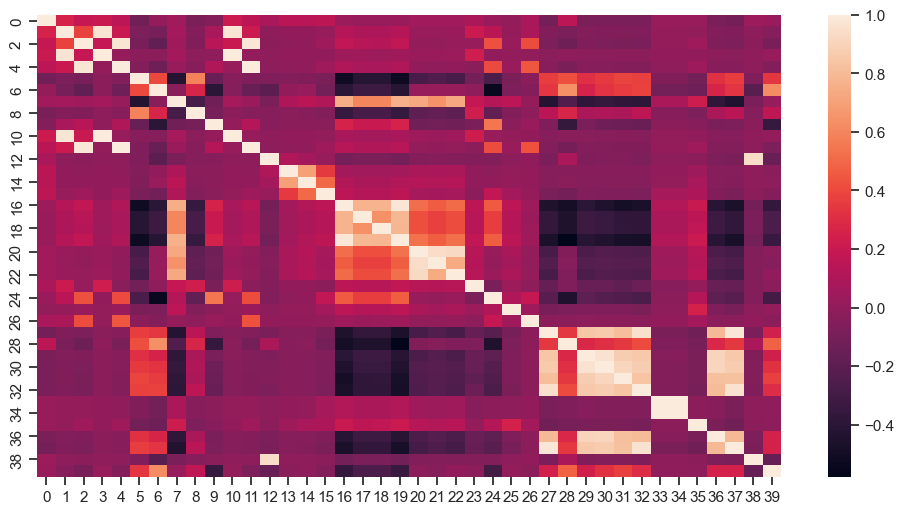

In [7]:
import seaborn as sns
sns.set_theme(style='ticks')

# num_data
sns.heatmap(pd.DataFrame(num_data).corr())

In [9]:
data[cat_cols] = data[cat_cols].astype('category')
for cat in cat_cols:
    data[cat] = data[cat].cat.codes

In [10]:
data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,119,0,5,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,6,0
1,0.000008,119,0,5,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,6,0
2,0.000005,119,0,5,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,6,0
3,0.000006,119,0,5,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,6,0
4,0.000010,119,0,5,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,119,2,5,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,5,1
257669,0.505762,113,0,4,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,8,1
257670,0.000009,119,2,5,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,5,1
257671,0.000009,119,2,5,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,5,1


<AxesSubplot: >

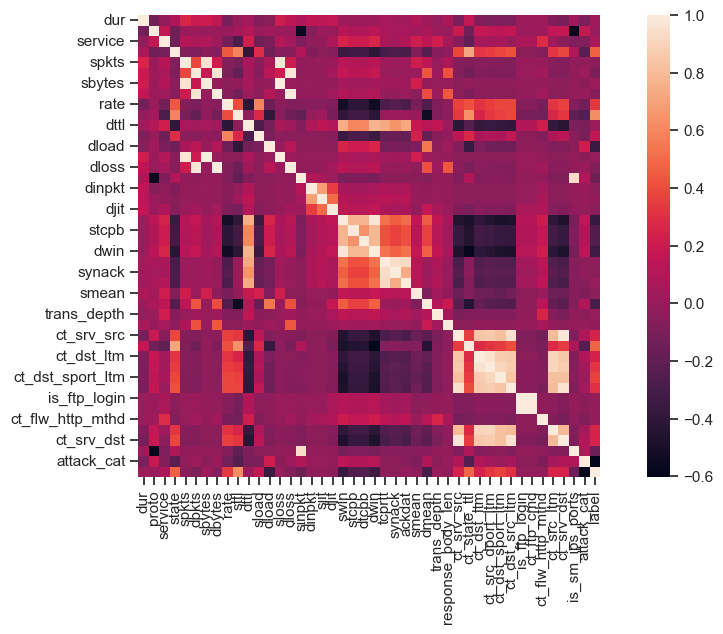

In [12]:
import seaborn as sns
sns.set_theme(style='ticks')

# num_data
sns.heatmap(data.corr(), square=True)

<AxesSubplot: >

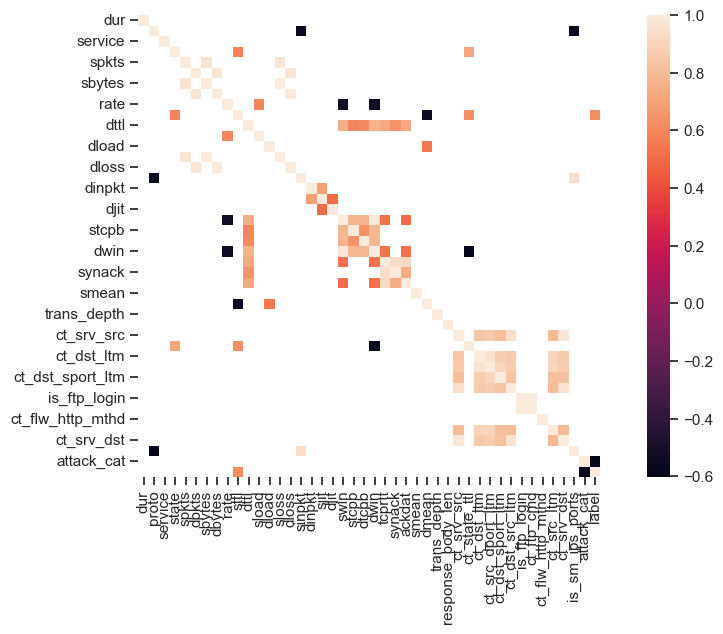

In [17]:
corr = data.corr()

corr = corr.where(abs(corr) > 0.5)

sns.heatmap(corr, square=True)